In [16]:
library(dplyr)
library(ggplot2)
library(qvalue)

In [6]:
folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/PCA/"

In [7]:
summary_filename = paste0(folder, "PCA1_summary.csv")
df0 = read.csv(summary_filename, row.names = 1)
df0$qv = qvalue(df0$pv, pi0 = 1)$qvalue
nrow(df0)
head(df0,2)

[1] 4442

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
0,ENSG00000172845_SP3,1,2,0.11316844,2_174679935_A_G,0.11316844,0.2341380
1,ENSG00000092758_COL9A3,1,20,0.06549851,20_61465531_G_T,0.06549851,0.1524866


In [24]:
summary_filename = paste0(folder, "PCA20_summary.csv")
df1 = read.csv(summary_filename, row.names = 1)
df1$qv = qvalue(df1$pv, pi0 = 1)$qvalue
nrow(df1)
head(df1,2)

[1] 513

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
0,ENSG00000243317_C7orf73,3,7,1.314361e-01,7_135324658_G_T,3.943083e-01,5.408560e-01
1,ENSG00000243317_C7orf73,3,7,2.024958e-10,7_135349273_A_T,6.074874e-10,4.794478e-09


In [25]:
df2 = inner_join(df0, df1, by = c("snpID","gene"), suffix = c(".1",".10"))
nrow(df2)
head(df2,2)

Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”

[1] 513

gene,n_snps.1,chrom.1,pv_raw.1,snpID,pv.1,qv.1,n_snps.10,chrom.10,pv_raw.10,pv.10,qv.10
ENSG00000243317_C7orf73,3,7,5.124394e-01,7_135324658_G_T,1.000000e+00,1.000000e+00,3,7,1.314361e-01,3.943083e-01,5.408560e-01
ENSG00000243317_C7orf73,3,7,7.759941e-07,7_135349273_A_T,2.327982e-06,3.096077e-05,3,7,2.024958e-10,6.074874e-10,4.794478e-09


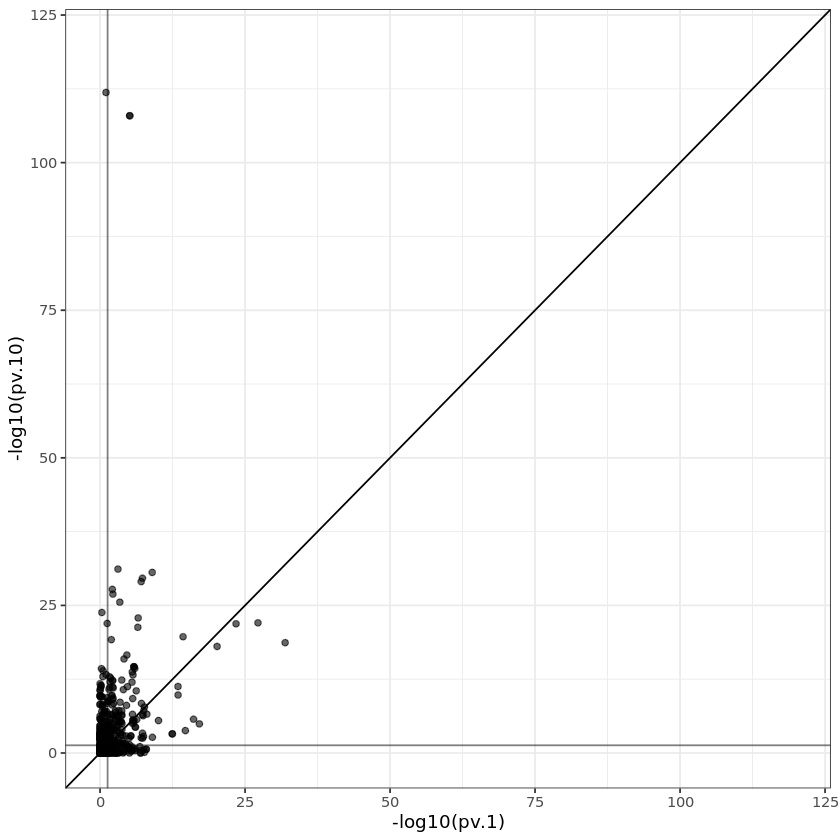

In [29]:
# p = ggplot(df2, aes(x = -log10(qv.1), y = -log10(qv.10))) + geom_point(alpha = 0.6) 
p = ggplot(df2, aes(x = -log10(pv.1), y = -log10(pv.10))) + geom_point(alpha = 0.6) 
p = p + geom_abline() + theme_bw()
p = p + geom_vline(xintercept = -log10(0.05), alpha = 0.5) + geom_hline(yintercept = -log10(0.05), alpha = 0.5)
p= p + xlim(c(0,120)) + ylim(c(0,120))
p

In [31]:
# df3 = df2[df2$qv.1>0.05 & df2$qv.10<0.05, ]
df3 = df2[df2$qv.10<0.05, ]
head(df3[order(df3$qv.10),])

,gene,n_snps.1,chrom.1,pv_raw.1,snpID,pv.1,qv.1,n_snps.10,chrom.10,pv_raw.10,pv.10,qv.10
278,ENSG00000226278_PSPHP1,3,7,3.117486e-02,7_55833413_A_C,9.352459e-02,2.025530e-01,3,7,4.425379e-113,1.327614e-112,6.810658e-110
276,ENSG00000226278_PSPHP1,3,7,2.539831e-06,7_55802063_T_C,7.619492e-06,8.440344e-05,3,7,3.795352e-109,1.138605e-108,1.947015e-106
277,ENSG00000226278_PSPHP1,3,7,2.539831e-06,7_55806087_G_T,7.619492e-06,8.440344e-05,3,7,3.795352e-109,1.138605e-108,1.947015e-106
414,ENSG00000108278_ZNHIT3,3,17,2.734250e-04,17_34848874_T_C,8.202749e-04,4.291709e-03,3,17,2.403927e-32,7.211780e-32,9.249108e-30
429,ENSG00000170291_ELP5,2,17,5.074048e-10,17_7145981_T_C,1.014810e-09,4.061067e-08,2,17,1.296413e-31,2.592826e-31,2.660240e-29
489,ENSG00000186230_ZNF749,2,19,2.457998e-08,19_57939619_C_T,4.915995e-08,1.105579e-06,2,19,1.227365e-30,2.454729e-30,2.098793e-28


In [3]:
folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/MOFA/"

In [7]:
summary_filename = paste0(folder, "MOFA1/summary_endo_eqtl.csv")
df0 = read.csv(summary_filename, row.names = 1)
df0$qv = qvalue(df0$pv, pi0 = 1)$qvalue
nrow(df0)
head(df0,2)

[1] 4410

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
0,ENSG00000140905_GCSH,1,16,0.21847265,16_81118466_A_G,0.21847265,0.75329505
1,ENSG00000011523_CEP68,2,2,0.00126596,2_65279223_C_T,0.00253192,0.05785372


In [8]:
summary_filename = paste0(folder, "MOFA10/summary_endo_eqtl.csv")
df1 = read.csv(summary_filename, row.names = 1)
df1$qv = qvalue(df1$pv, pi0 = 1)$qvalue
nrow(df1)
head(df1,2)

[1] 4470

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
0,ENSG00000140905_GCSH,1,16,0.005333072,16_81118466_A_G,0.005333072,0.04905109
1,ENSG00000011523_CEP68,2,2,0.062120960,2_65279223_C_T,0.124241919,0.43319920


In [9]:
df2 = inner_join(df0, df1, by = c("snpID","gene"), suffix = c(".1",".10"))
head(df2)

Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”

gene,n_snps.1,chrom.1,pv_raw.1,snpID,pv.1,qv.1,n_snps.10,chrom.10,pv_raw.10,pv.10,qv.10
ENSG00000140905_GCSH,1,16,0.21847265,16_81118466_A_G,0.21847265,0.75329505,1,16,0.005333072,0.005333072,0.04905109
ENSG00000011523_CEP68,2,2,0.00126596,2_65279223_C_T,0.00253192,0.05785372,2,2,0.062120960,0.124241919,0.43319920
ENSG00000011523_CEP68,2,2,0.01527360,2_65290842_C_A,0.03054720,0.28970571,2,2,0.155643180,0.311286360,0.70275254
ENSG00000178814_OPLAH,1,8,0.13357677,8_145114924_G_C,0.13357677,0.61297976,1,8,0.701219814,0.701219814,1.00000000
ENSG00000013583_HEBP1,1,12,0.20727768,12_13154105_A_T,0.20727768,0.73717303,1,12,0.382112530,0.382112530,0.78207097
ENSG00000143942_CHAC2,1,2,0.29017872,2_54010876_C_A,0.29017872,0.84474186,1,2,0.532707767,0.532707767,0.91725875


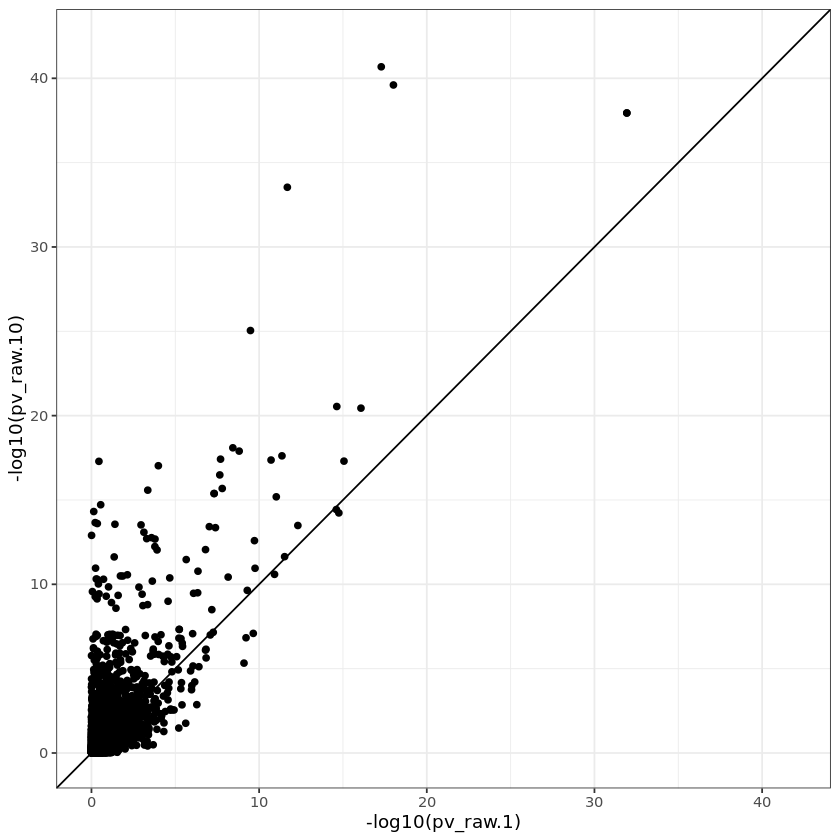

In [10]:
p = ggplot(df2, aes(x = -log10(pv_raw.1), y = -log10(pv_raw.10))) + geom_point() + theme_bw()
p = p + xlim(c(0,42)) + ylim(c(0,42))
p = p + geom_abline()
p

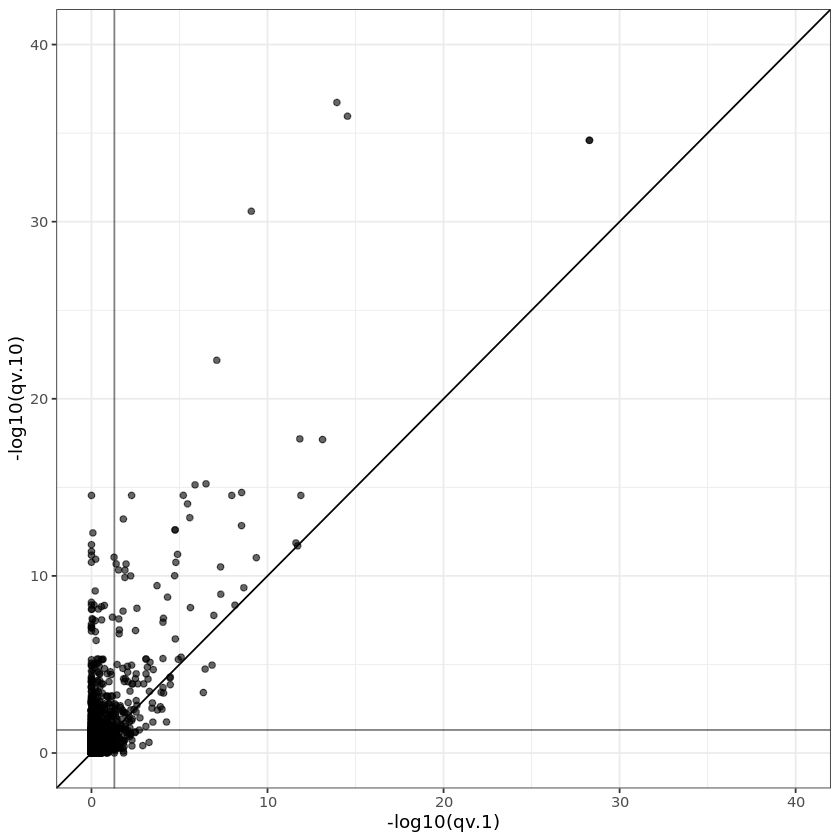

In [25]:
p = ggplot(df2, aes(x = -log10(qv.1), y = -log10(qv.10))) + geom_point(alpha = 0.6) 
p = p + geom_abline() + theme_bw()
p = p + geom_vline(xintercept = -log10(0.05), alpha = 0.5) + geom_hline(yintercept = -log10(0.05), alpha = 0.5)
p = p + xlim(c(0,40)) + ylim(c(0,40))
p

In [27]:
df3 = df2[df2$qv.1>0.05 & df2$qv.10<0.05, ]
head(df3[order(df3$qv.10),])

,gene,n_snps.1,chrom.1,pv_raw.1,snpID,pv.1,qv.1,n_snps.10,chrom.10,pv_raw.10,pv.10,qv.10
2297,ENSG00000164344_KLKB1,2,4,0.358694080,4_187174030_G_T,0.717388160,1.00000000,2,4,5.121085e-18,1.024217e-17,2.861406e-15
583,ENSG00000104435_STMN2,1,8,0.281371632,8_80509881_T_C,0.281371632,0.83320707,1,8,1.916439e-15,1.916439e-15,3.724557e-13
3516,ENSG00000173401_GLIPR1L1,2,12,0.729754117,12_75737206_G_A,1.000000000,1.00000000,2,12,4.843888e-15,9.687777e-15,1.732174e-12
4061,ENSG00000124693_HIST1H3B,1,6,0.447403801,6_26020936_C_T,0.447403801,1.00000000,1,6,2.498817e-14,2.498817e-14,4.136930e-12
3517,ENSG00000173401_GLIPR1L1,2,12,0.599860326,12_75768869_G_T,1.000000000,1.00000000,2,12,2.197168e-14,4.394336e-14,6.773338e-12
570,ENSG00000176654_NANOGP1,2,12,0.001104738,12_7945871_C_T,0.002209476,0.05210583,2,12,2.994267e-14,5.988533e-14,8.922914e-12


In [31]:
df4 = df2[df2$qv.1<0.05 & df2$qv.10<0.05, ]
head(df4[order(df4$qv.10),])

,gene,n_snps.1,chrom.1,pv_raw.1,snpID,pv.1,qv.1,n_snps.10,chrom.10,pv_raw.10,pv.10,qv.10
203,ENSG00000229150_CRYGEP,2,2,5.201755e-18,2_208977797_G_T,1.040351e-17,1.146987e-14,2,2,2.084663e-41,4.169326e-41,1.863689e-37
202,ENSG00000229150_CRYGEP,2,2,9.763035e-19,2_208977362_C_A,1.952607e-18,2.870332e-15,2,2,2.492542e-40,4.985085e-40,1.114166e-36
3442,ENSG00000169877_AHSP,2,16,1.173470e-32,16_31522723_T_C,2.346940e-32,5.175003e-29,2,16,1.140478e-38,2.280957e-38,2.548969e-35
3443,ENSG00000169877_AHSP,2,16,1.173470e-32,16_31526823_G_A,2.346940e-32,5.175003e-29,2,16,1.140478e-38,2.280957e-38,2.548969e-35
2266,ENSG00000111913_FAM65B,1,6,2.077772e-12,6_24979164_T_A,2.077772e-12,8.329977e-10,1,6,2.887645e-34,2.887645e-34,2.581555e-31
4006,ENSG00000148291_SURF2,1,9,3.283198e-10,9_136227260_A_G,3.283198e-10,7.620474e-08,1,9,8.996118e-26,8.996118e-26,6.702108e-23
